# Ingenia Data Analysis (2023 Q1)

In order to determine how the trends found last year have affected--and possibly improved the company's performance, it's critical to analyze the current performance.

## General stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('STATUS ASIGNACIÓN INDRA_GENERAL (HANSSEL)_2023.csv', encoding = 'latin-1', )
df

,YEAR,MONTH,QUARTER,SITE,TYPE,DESCRIPTION,LOCATION,ANALYST,REQUEST_DATE,SENDING_STATUS,DATE,APPROVAL_STATUS,APPROVAL_DATE,EXECUTION_STATUS,REPORT_DATE,START_DATE,END_DATE,QUOTATION
0,2023,ENERO,Q1,SATÉLITE,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE AUTOSO...,ANCASH,VARGAS,1-Jan,ENVIADA,1-Jan,PENDIENTE,PENDIENTE,SIN EJECUCIÓN,NaN,NaN,NaN,3565.09
1,2023,ENERO,Q1,CARAZ,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE AUTOSO...,ANCASH,VARGAS,1-Jan,ENVIADA,1-Jan,PENDIENTE,PENDIENTE,SIN EJECUCIÓN,NaN,NaN,NaN,4011.13
2,2023,ENERO,Q1,VELASCO ASTETE,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE ARRIOS...,CUSCO,VARGAS,1-Jan,ENVIADA,1-Jan,APROBADA,27-Jan,EJECUTADO,20-Feb,9-Feb,9-Feb,2472.94
3,2023,ENERO,Q1,AMBO,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE AUTOSO...,AMBO,VARGAS,1-Jan,ENVIADA,1-Jan,PENDIENTE,PENDIENTE,SIN EJECUCIÓN,NaN,NaN,NaN,4011.13
4,2023,ENERO,Q1,AEROPISCO,TORRE,1. INSPECCIÓN - RELEVAMIENTO Y EE TORRE AUTOSO...,ICA,VARGAS,1-Jan,ENVIADA,1-Jan,PENDIENTE,PENDIENTE,SIN EJECUCIÓN,NaN,NaN,NaN,2827.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2022,DICIEMBRE,Q4,SAN BORJA,INFRA,1. SUMINISTRO E INSTALACIÓN DE CANDADO Y CADEN...,LIMA,ORTEGA,21-Dec,ENVIADA,21-Dec,APROBADA,22-Dec,SIN EJECUCIÓN,NaN,NaN,NaN,203.62
414,2022,DICIEMBRE,Q4,PICSI,INFRA,1. CAMBIO DE BISAGRAS.,LIMA,ORTEGA,22-Dec,ENVIADA,22-Dec,PENDIENTE,22-Dec,SIN EJECUCIÓN,NaN,NaN,NaN,805.95
415,2022,DICIEMBRE,Q4,COCHERA MEDIA NETWORKS,INFRA,1. ENCUADRE DE PORTÓN DE INGRESO VEHICULAR.,LIMA,MARTÍNEZ,22-Dec,ENVIADA,23-Dec,PENDIENTE,22-Dec,SIN EJECUCIÓN,NaN,NaN,NaN,916.42
416,2022,DICIEMBRE,Q4,NUEVA CAÑ,INFRA,1. LIMPIEZA Y FUMIGACIÓN DE SALA DE EQUIPOS.\n...,LIMA,ORTEGA,26-Dec,ENVIADA,26-Dec,PENDIENTE,22-Dec,SIN EJECUCIÓN,NaN,NaN,NaN,1688.09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              418 non-null    int64 
 1   MONTH             418 non-null    object
 2   QUARTER           418 non-null    object
 3   SITE              418 non-null    object
 4   TYPE              418 non-null    object
 5   DESCRIPTION       418 non-null    object
 6   LOCATION          418 non-null    object
 7   ANALYST           418 non-null    object
 8   REQUEST_DATE      418 non-null    object
 9   SENDING_STATUS    418 non-null    object
 10  DATE              418 non-null    object
 11  APPROVAL_STATUS   418 non-null    object
 12  APPROVAL_DATE     418 non-null    object
 13  EXECUTION_STATUS  418 non-null    object
 14  REPORT_DATE       124 non-null    object
 15  START_DATE        126 non-null    object
 16  END_DATE          126 non-null    object
 17  QUOTATION       

In [4]:
df.shape

(418, 18)

In [5]:
df.describe()

,YEAR
count,418.000000
mean,2022.251196
std,0.434221
min,2022.000000
25%,2022.000000
50%,2022.000000
75%,2022.750000
max,2023.000000


#### Transforming "QUOTATION" values into numeric values

In [6]:
df['QUOTATION'] = pd.to_numeric(df['QUOTATION'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

In [7]:
df['QUOTATION'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: QUOTATION
Non-Null Count  Dtype  
--------------  -----  
418 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [8]:
df.loc[(df['YEAR'] == 2023) & (df['APPROVAL_STATUS'] == 'APROBADA'), 'QUOTATION'].sum()

134574.014436

Total 2023 revenue, so far.

In [9]:
df.loc[(df['YEAR'] == 2023) & (df['APPROVAL_STATUS'] == 'APROBADA'), 'QUOTATION'].groupby(df['TYPE']).sum().to_frame()

,QUOTATION
TYPE,
INFRA,67328.980116
TORRE,67245.034320


Tower (TORRE) related services have brought much more revenue than Infrastructure (INFRA) related ones, so far.

## Comparison between 2022 and 2023 data

In [10]:
revenue_per_year = df.loc[df['APPROVAL_STATUS'] == 'APROBADA', 'QUOTATION'].groupby(df['YEAR'])
revenue_per_year.agg(['sum', 'count'])

,sum,count
YEAR,,
2022,347963.560000,108
2023,134574.014436,30


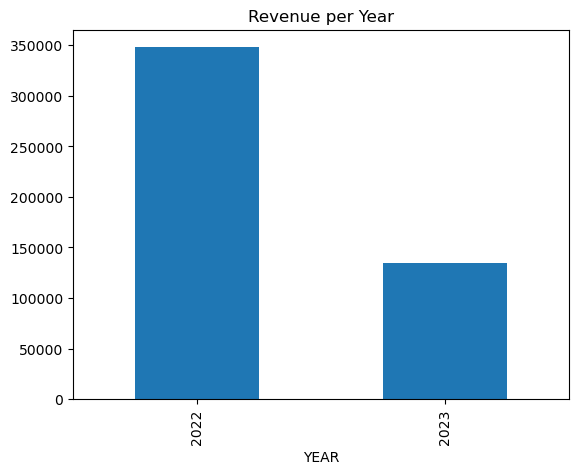

In [11]:
revenue_per_year.sum().plot(kind='bar')
plt.title('Revenue per Year')
plt.show()

2023's revenue has reached a 38.7% of 2022's total revenue.

In [12]:
revenue_per_type_year = df.loc[df['APPROVAL_STATUS'] == 'APROBADA', 'QUOTATION'].groupby([df['YEAR'], df['TYPE']]).sum().to_frame()
revenue_per_type_year

QUOTATION
YEAR TYPE                
2022 INFRA  209121.780000
     TORRE  138841.780000
2023 INFRA   67328.980116
     TORRE   67245.034320

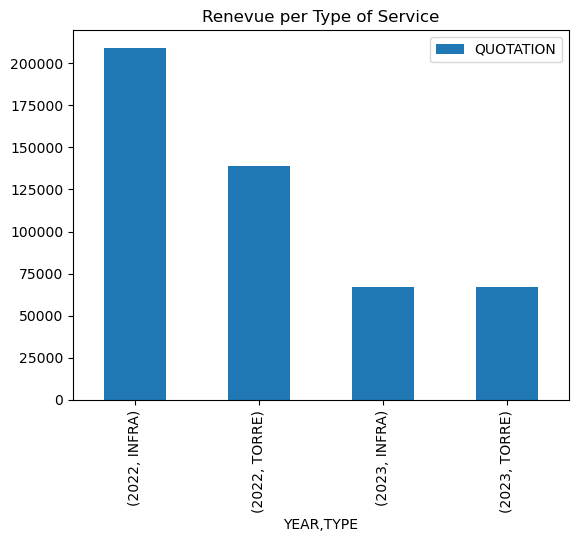

In [13]:
revenue_per_type_year.plot(kind='bar')
plt.title('Renevue per Type of Service')
plt.show()

Tower services represent 50%+ of 2023's overall revenue.

In [14]:
df.loc[df['APPROVAL_STATUS'] == 'APROBADA', 'QUOTATION'].groupby([df['YEAR'], df['QUARTER']]).sum().to_frame()

QUOTATION
YEAR QUARTER               
2022 Q1        34409.230000
     Q2       136040.880000
     Q3        55571.040000
     Q4       121942.410000
2023 Q1       134574.014436

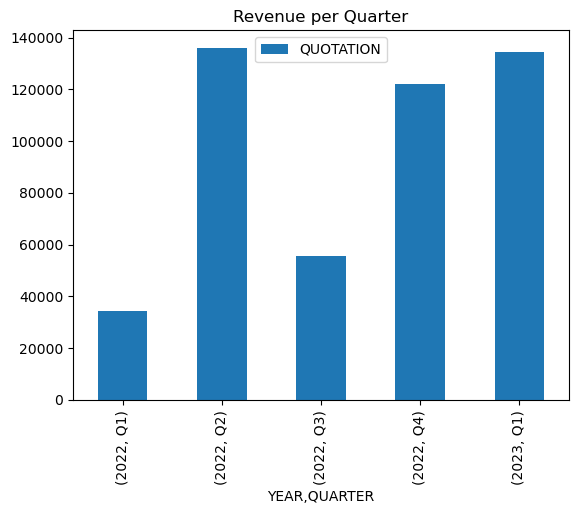

In [15]:
df.loc[df['APPROVAL_STATUS'] == 'APROBADA', 'QUOTATION'].groupby([df['YEAR'], df['QUARTER']]).sum().to_frame().plot(kind='bar')
plt.title('Revenue per Quarter')
plt.show()

Q1's revenue (Mar 2023) has already overcome 2022 Q1's revenue as well as 2022 Q3's revenue and Q4's revenue.

## 2023 stats

In [16]:
df.loc[(df['APPROVAL_STATUS'] == 'APROBADA') & (df['YEAR'] == 2023), 'QUOTATION'].groupby(df['ANALYST']).agg(['sum', 'count'])

,sum,count
ANALYST,,
BARRENECHEA,3400.000000,8
MARTÍNEZ,11191.580000,2
ORTEGA,590.140000,1
VARGAS,119392.294436,19


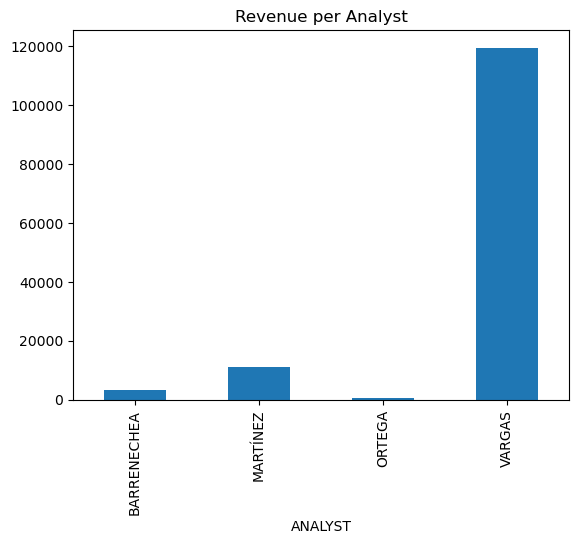

In [17]:
df.loc[(df['APPROVAL_STATUS'] == 'APROBADA') & (df['YEAR'] == 2023), 'QUOTATION'].groupby(df['ANALYST']).sum().plot(kind='bar')
plt.title('Revenue per Analyst')
plt.show()

Vargas has been the most profitable analyst, so far. The incomes generated through him represent 85%+ of 2023's overall revenue.

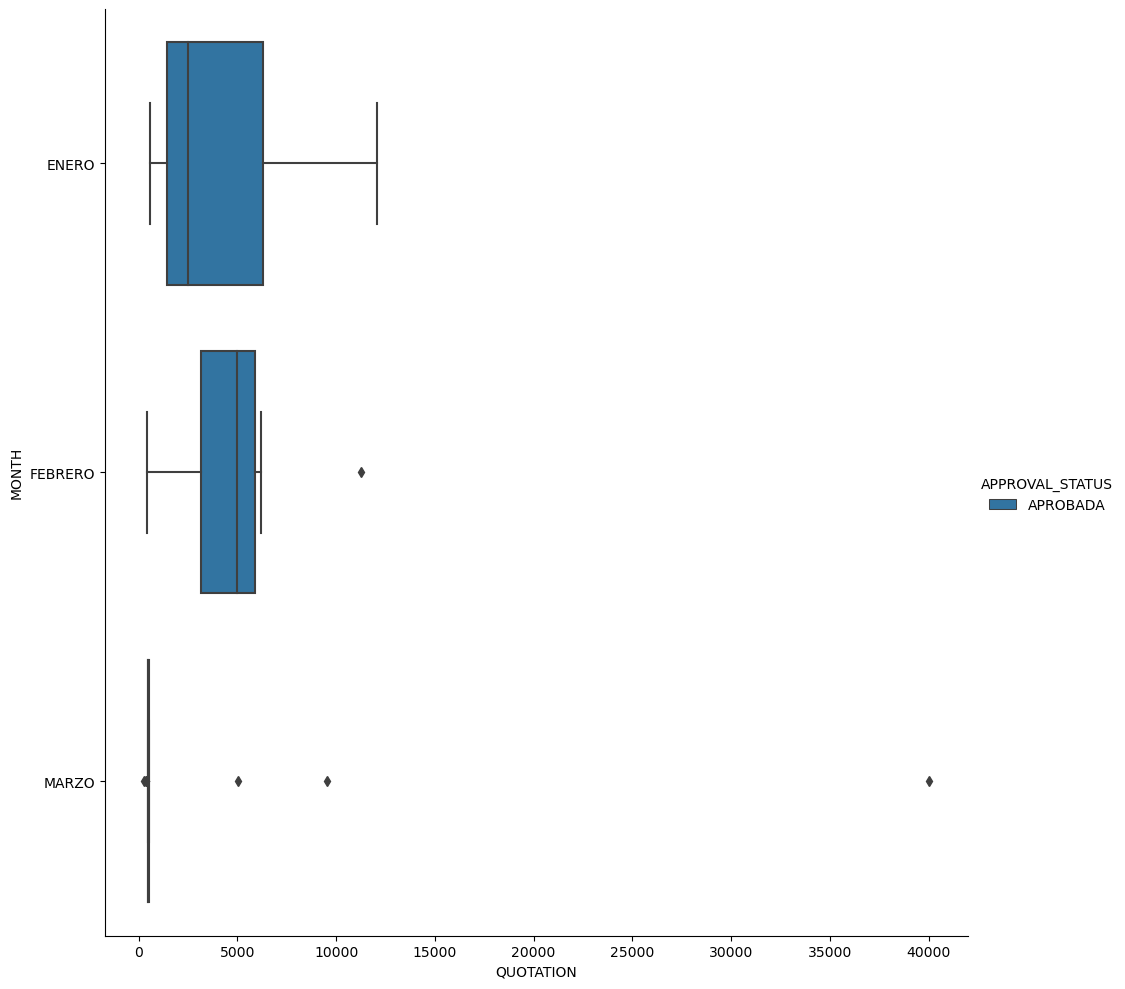

In [18]:
sns.catplot(data = df.loc[(df['APPROVAL_STATUS'] == 'APROBADA') & (df['YEAR'] == 2023)], y='MONTH', x='QUOTATION', kind='box',
            hue='APPROVAL_STATUS', height=10, aspect=1
)

## Conclusions

1. Since 2023 Q1's revenue has largely overcome 2022 Q1's revenue (4X), it's correct to affirm that the current performance is doing great.

2. 50%+ of 2023's revenue has been produced by the execution of Tower services.

3. 85%+ of 2023's revenue has been produced by the execution of Vargas' approved services, as determined in 2022's Analysis. Given that, the insights found last year have been determinant to predict which Analyst was the top priority.

In [19]:
revenue_per_type_year_quarter = df.loc[(df['APPROVAL_STATUS'] == 'APROBADA'), 'QUOTATION'].groupby([df['YEAR'], df['QUARTER'], df['TYPE']]).agg(['sum', 'count'])
revenue_per_type_year_quarter

sum  count
YEAR QUARTER TYPE                      
2022 Q1      INFRA  34409.230000     15
     Q2      INFRA  85373.070000     19
             TORRE  50667.810000     11
     Q3      INFRA  14607.130000     13
             TORRE  40963.910000     18
     Q4      INFRA  74732.350000     26
             TORRE  47210.060000      6
2023 Q1      INFRA  67328.980116     17
             TORRE  67245.034320     13

In [20]:
#GENERAL
requests_per_location = df['QUOTATION'].groupby([df['YEAR'], df['LOCATION']]).agg(['sum', 'count'])
requests_per_location

sum  count
YEAR LOCATION                          
2022 AMAZONAS        2800.000000      1
     APURÍMAC           0.000000      1
     AREQUIPA       24478.930000      8
     AYACUCHO         989.640000      1
     CAJAMARCA       7364.460000      6
     CHICLAYO      187062.550000     29
     CHIMBOTE        2103.600000      5
     CUSCO          33870.570000      1
     HUANCAYO        5334.050000      3
     ICA            18762.070000      6
     IQUITOS        50272.430000      8
     JUANJUI         2800.000000      1
     JUNÍN          23674.020000      6
     LAMAS          95090.390000      8
     LIMA          736237.370000    135
     MOYOBAMBA      54821.850000      2
     PASCO          23324.330000      6
     PIURA         129739.840000     26
     TARAPOTO       14582.580000      2
     TRUJILLO      161975.170000     17
     TUMBES        116313.760000      5
     UCAYALI         1037.940000      1
     VARIOS        309147.510000     12
     ÁNCASH         95924.360000     23
2023 AMAZONAS       14357.330000      1
     AMBO            4011.130000      1
     ANCASH         15626.870000      5
     AREQUIPA       41929.119700      8
     CHICLAYO       14146.914280      4
     CUSCO           2472.940000      1
     HUANCAVELICA    4806.920000      2
     HUANCAYO        2743.860000      2
     ICA             3865.270000      2
     LAMAS         111539.950000      6
     LIMA          182715.630606     51
     PASCO          12373.670000      2
     PIURA          42352.300000      3
     PUNO            7401.710000      3
     TACNA          13989.218499      7
     TRUJILLO       24755.767500      4
     TUMBES         43737.500000      3

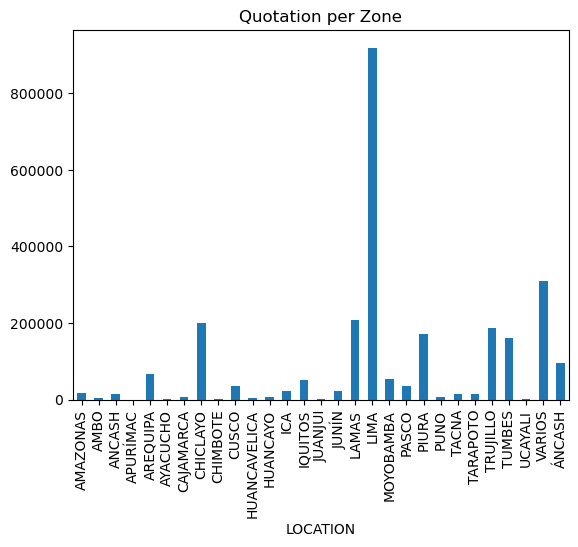

In [21]:
#GENERAL
df['QUOTATION'].groupby(df['LOCATION']).sum().plot(kind='bar')
plt.title('Quotation per Zone')
plt.show()

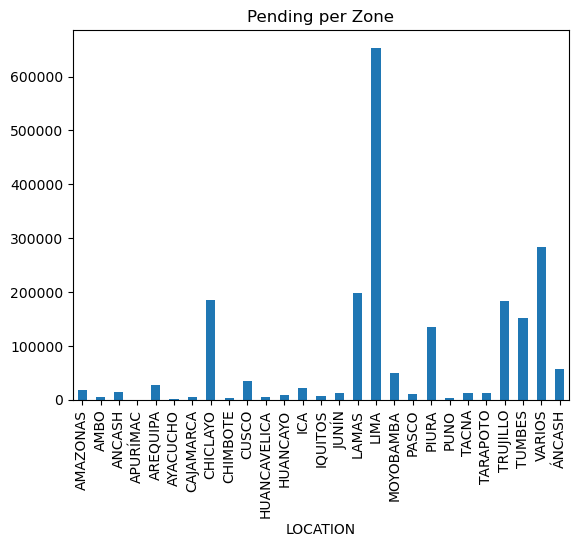

In [22]:
#PENDING
df.loc[df['APPROVAL_STATUS'] == 'PENDIENTE', 'QUOTATION'].groupby(df['LOCATION']).sum().plot(kind='bar')
plt.title('Pending per Zone')
plt.show()

In [23]:
#2023, APPROVED V. PENDING
df.loc[(df['YEAR'] == 2023) & (df['QUARTER'] == 'Q1'), 'QUOTATION'].groupby(df['APPROVAL_STATUS']).agg(['sum', 'count'])

,sum,count
APPROVAL_STATUS,,
APROBADA,134574.014436,30
PENDIENTE,408252.086149,75


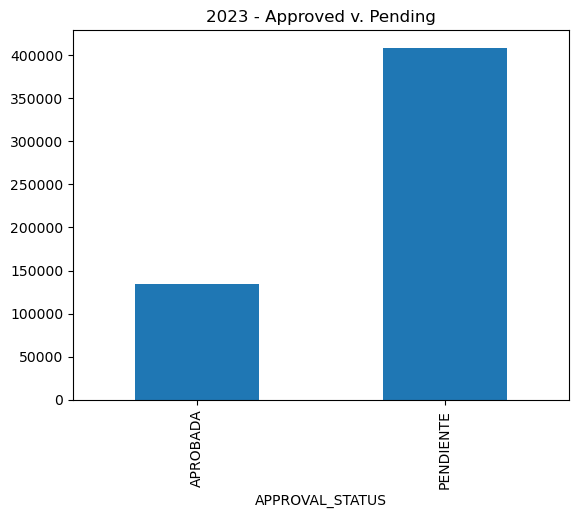

In [25]:
df.loc[(df['YEAR'] == 2023) & (df['QUARTER'] == 'Q1'), 'QUOTATION'].groupby(df['APPROVAL_STATUS']).sum().plot(kind='bar')
plt.title('2023 - Approved v. Pending')
plt.show()

In [40]:
df.loc[(df['YEAR'] == 2023) & (df['APPROVAL_STATUS'] == 'APROBADA'), 'QUOTATION'].groupby([df['QUARTER'], df['EXECUTION_STATUS'], df['TYPE']]).agg(['sum', 'count'])

sum  count
QUARTER EXECUTION_STATUS TYPE                      
Q1      EJECUTADO        INFRA  17811.650000     15
                         TORRE  41672.480000     10
        SIN EJECUCIÓN    INFRA  49517.330116      2
                         TORRE  25572.554320      3